In [1]:
import numpy as np
import pandas as pd

<font color=red size=4> Date exploration

In [2]:
df = pd.read_csv('All National Parks Visitation 1904-2016.csv',skipinitialspace=True)
df.head(10)

,Created By,Measure Selector,Year,Date Edit,ScrapeURL,GIS Notes,Gnis Id,Geometry,Metadata,Number of Records,Parkname,Region,State,Unit Code,Unit Name,Unit Type,Visitors,YearRaw
0,Legacy,1,1/1/1904 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1163670,POLYGON,NaN,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500.0,1904
1,Legacy,1,1/1/1941 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1531834,MULTIPOLYGON,NaN,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0.0,1941
2,Legacy,1,1/1/1961 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,2055170,MULTIPOLYGON,NaN,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000.0,1961
3,Legacy,1,1/1/1935 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact allen_mccoy@nps.gov for additi...,1530459,MULTIPOLYGON,NaN,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200.0,1935
4,Legacy,1,1/1/1982 12:00:00 AM,4/22/2015,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: contact denise_kamradt@nps.gov for add...,277263,POLYGON,NaN,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144.0,1982
5,Legacy,1,1/1/1919 12:00:00 AM,12/18/2013,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: NPS Inventory and Monitoring Program D...,578853,MULTIPOLYGON,NaN,1,NaN,NE,ME,ACAD,Acadia National Park,National Park,64000.0,1919
6,Legacy,1,1/1/1969 12:00:00 AM,12/18/2013,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: NPS Inventory and Monitoring Program D...,1329499,MULTIPOLYGON,NaN,1,NaN,IM,TX,AMIS,Amistad National Recreation Area,National Recreation Area,448000.0,1969
7,Legacy,1,1/1/1967 12:00:00 AM,12/18/2013,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: NPS Inventory and Monitoring Program D...,589056,POLYGON,NaN,1,NaN,NE,MD,ASIS,Assateague Island National Seashore,National Seashore,738700.0,1967
8,Legacy,1,1/1/1944 12:00:00 AM,12/18/2013,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: NPS Inventory and Monitoring Program D...,1377082,POLYGON,NaN,1,NaN,IM,TX,BIBE,Big Bend National Park,National Park,1409.0,1944
9,Legacy,1,1/1/1989 12:00:00 AM,12/18/2013,https://irma.nps.gov/Stats/SSRSReports/Park%20...,LEGACY: NPS Inventory and Monitoring Program D...,302659,POLYGON,NaN,1,NaN,SE,FL,BICY,Big Cypress National Preserve,National Preserve,81157.0,1989


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21560 entries, 0 to 21559
Data columns (total 18 columns):
Created By           21560 non-null object
Measure Selector     21560 non-null int64
Year                 21560 non-null object
Date Edit            21560 non-null object
ScrapeURL            21560 non-null object
GIS Notes            21560 non-null object
Gnis Id              21560 non-null object
Geometry             21560 non-null object
Metadata             18848 non-null object
Number of Records    21560 non-null int64
Parkname             19342 non-null object
Region               21560 non-null object
State                21560 non-null object
Unit Code            21560 non-null object
Unit Name            21560 non-null object
Unit Type            21560 non-null object
Visitors             21556 non-null float64
YearRaw              21560 non-null object
dtypes: float64(1), int64(2), object(15)
memory usage: 3.0+ MB


<font color=red size=4>So we can see three features have missing data: <br>
Metadata             
Number of Records    
Parkname            
    # Metadate can be dropped
    # number of records can be filled (probably 1 for each record) or dropped
    # Parkname and unit name are the same thing
    
    
    

In [4]:
df.describe()

,Measure Selector,Number of Records,Visitors
count,21560.0,21560.0,2.155600e+04
mean,1.0,1.0,1.277105e+06
std,0.0,0.0,1.190148e+07
min,1.0,1.0,0.000000e+00
25%,1.0,1.0,3.912475e+04
50%,1.0,1.0,1.552190e+05
75%,1.0,1.0,6.081438e+05
max,1.0,1.0,8.719228e+08


In [5]:
df.drop(columns=['Created By', 'Measure Selector', 'Date Edit','ScrapeURL', 'GIS Notes', 'Metadata'],inplace=True)

In [6]:
df.head(5)

,Year,Gnis Id,Geometry,Number of Records,Parkname,Region,State,Unit Code,Unit Name,Unit Type,Visitors,YearRaw
0,1/1/1904 12:00:00 AM,1163670,POLYGON,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500.0,1904
1,1/1/1941 12:00:00 AM,1531834,MULTIPOLYGON,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0.0,1941
2,1/1/1961 12:00:00 AM,2055170,MULTIPOLYGON,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000.0,1961
3,1/1/1935 12:00:00 AM,1530459,MULTIPOLYGON,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200.0,1935
4,1/1/1982 12:00:00 AM,277263,POLYGON,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144.0,1982


<font color=red size=4> Park popularity

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

year_vistors_sum = df.groupby('YearRaw')['Visitors'].sum()
#year_vistors_sum[:-2].plot()

plt.plot(np.array(year_vistors_sum.index)[:-1].astype(int),np.array(year_vistors_sum[:-1]))
plt.xlabel('Year')
plt.ylabel('visitors')


Text(0,0.5,'visitors')

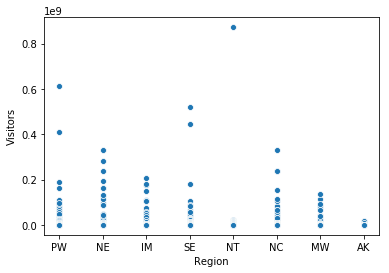

In [8]:
sns.scatterplot(x = 'Region' ,y ='Visitors',data = df)


In [9]:
park_pop= df.groupby('Unit Name')['Visitors'].sum().sort_values()

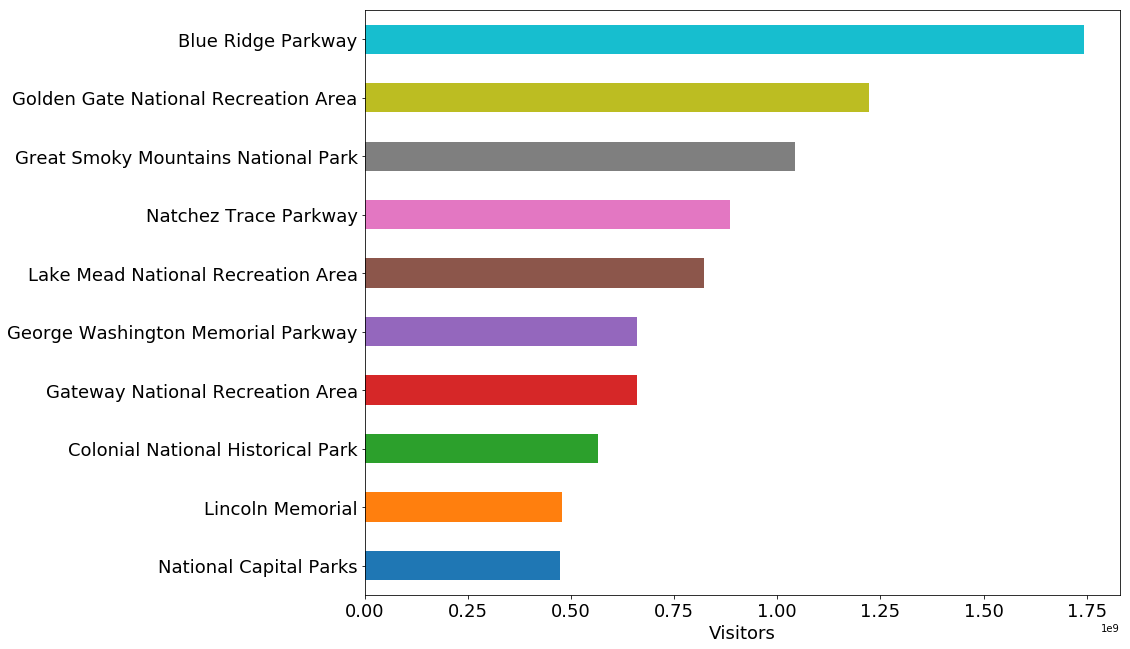

In [108]:

fig, ax = plt.subplots(1, figsize=(16, 9))
park_pop.tail(10).plot.barh(fontsize=18)
plt.tight_layout()
plt.xlabel('Visitors',fontsize = 18)
plt.ylabel('')

fig.savefig('Park_top10.png', dpi=300)


In [11]:
State_pop= df.groupby('State')['Visitors'].sum().sort_values()

In [52]:
State_visitors = State_pop.reset_index()

In [53]:
State_visitors

,State,Visitors
0,AS,2.273880e+05
1,CT,8.547880e+05
2,VT,1.285176e+06
3,NH,2.904506e+06
4,RI,3.289094e+06
5,KS,9.113664e+06
6,GU,9.505822e+06
7,NE,2.728261e+07
8,AL,2.998848e+07
9,IA,3.105698e+07


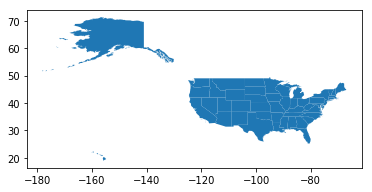

In [15]:
# set the filepath and load
import geopandas as gpd
fp = r"states_21basic/states.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
map_df.head()
map_df.plot()

In [109]:
map_df.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


In [54]:
merged = map_df.set_index('STATE_ABBR').join(State_visitors.set_index('State')).dropna()

merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 50 entries, HI to AK
Data columns (total 6 columns):
STATE_NAME    50 non-null object
DRAWSEQ       50 non-null int64
STATE_FIPS    50 non-null object
SUB_REGION    50 non-null object
geometry      50 non-null object
Visitors      50 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ KB


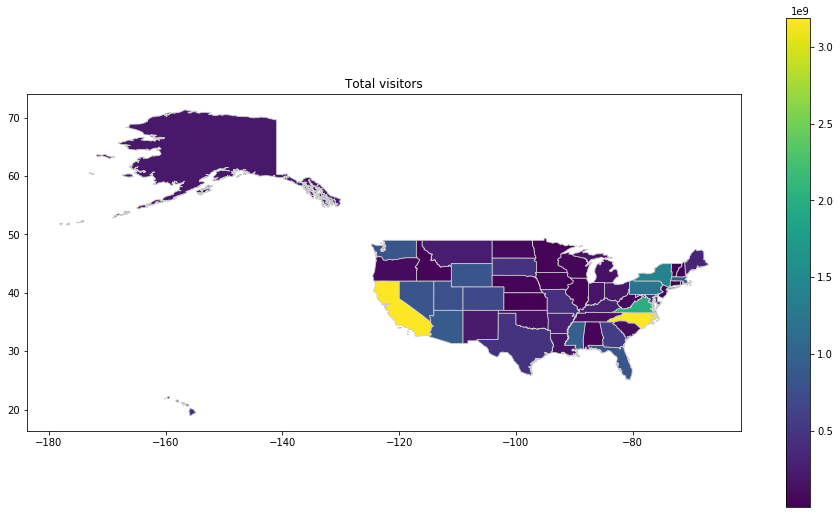

In [80]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Visitors'
cmap = 'viridis'

# set the range for the choropleth
vmin, vmax = 120, 220
num_colors = 40

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.set_title('Total visitors')

merged.plot(column=variable,cmap=cmap,k=num_colors,legend=True, linewidth=0.8, ax=ax, edgecolor='0.8')
fig.savefig('map_export.png', dpi=300)


Text(0.5,0,'Visitors')

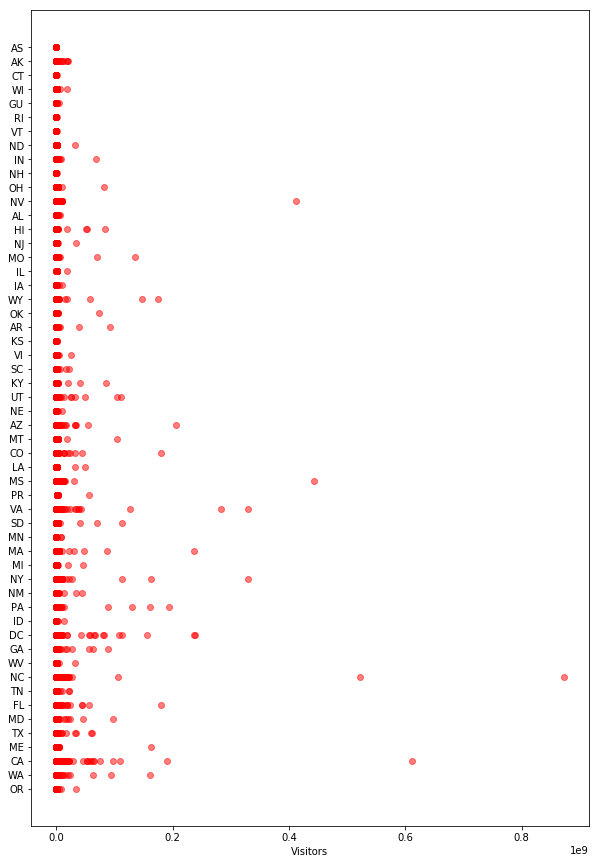

In [83]:
fig, ax = plt.subplots(1, figsize=(10, 15))

plt.scatter(y=df["State"], x=df["Visitors"], alpha=0.5, c='r')
plt.xlabel('Visitors')

